# DATA

In [1]:
import pandas as pd

In [2]:
#open data
df = pd.read_excel('data.xlsx')
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0    2003-02-24   Shipped       1         2     2003  ...   
1    2003-05-07   Shipped       2         5     2003  ...   
2    2003-07-01   Shipped       3         7     2003  ...   
3    2003-08-25   Shipped       3         8     2003  ...   
4    2003-10-10   Shipped       4        10     2003  ...   
...         ...       ...     ...       ...      ...  ...   
2818 2004-12-02   Shipped       4        12     2004  ...   
2819 2005-01-31   Shipped       1         1     2005  ...   
2820 2005-03-01  Resolved       1         3     2005  ...   
2821 2005-03-28   Shipped       1         3     2005  ...   
2822 2005-05-06   On Hold       2         5     2005  ...   

                       ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0           897 Long Airport Avenue           NaN            NYC    NY   
1                59 rue de l'Abbaye           NaN          Reims   NaN   
2     27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3                78934 Hillside Dr.           NaN       Pasadena    CA   
4                   7734 Strong St.           NaN  San Francisco    CA   
...                             ...           ...            ...   ...   
2818             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2819                    Torikatu 38           NaN           Oulu   NaN   
2820             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2821          1 rue Alsace-Lorraine           NaN       Toulouse   NaN   
2822             8616 Spinnaker Dr.           NaN         Boston    MA   

     POSTALCODE  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         10022      USA       NaN              Yu             Kwai    Small  
1         51100   France      EMEA         Henriot             Paul    Small  
2         75508   France      EMEA        Da Cunha           Daniel   Medium  
3         90003      USA       NaN           Young            Julie   Medium  
4           NaN      USA       NaN           Brown            Julie   Medium  
...         ...      ...       ...             ...              ...      ...  
2818      28034    Spain      EMEA          Freyre            Diego    Small  
2819      90110  Finland      EMEA       Koskitalo           Pirkko   Medium  
2820      28034    Spain      EMEA          Freyre            Diego   Medium  
2821      31000   France      EMEA          Roulet          Annette    Small  
2822      51003      USA       NaN         Yoshido             Juri   Medium  

[2823 rows x 25 columns]

# REMOVING COLUMNS TO SIMPLIFY THE DATA

In [3]:
# Drop columns that have null columns

columns_to_drop = ['ADDRESSLINE2', 'STATE', 'TERRITORY','POSTALCODE']
df = df.drop(columns=columns_to_drop)

In [4]:
# Drop columns that are related to the customer info. we dont really need that.

columns_to_drop = ['ORDERNUMBER','PHONE', 'ADDRESSLINE1','CONTACTLASTNAME','CONTACTFIRSTNAME']
df = df.drop(columns=columns_to_drop)

In [5]:
# Drop columns PRODUCTCODE bc it has the info as PRODUCTLINE

columns_to_drop = ['PRODUCTCODE']
df = df.drop(columns=columns_to_drop)

In [6]:
# Drop columns PRODUCTCODE bc it has the info as PRODUCTLINE

columns_to_drop = ['ORDERDATE']
df = df.drop(columns=columns_to_drop)

# TRANSFORMING CATEGORICAL VALUES INTO INTEGERS

In [7]:
#replace categorical columns by integers
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def label_encode_column(df, column_name):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the specified column
    df[column_name + '_encoded'] = label_encoder.fit_transform(df[column_name])
    
    # Drop the original categorical column
    df.drop(columns=[column_name], inplace=True)
    
    return df

In [8]:
# Example usage:
# Assuming df is your DataFrame and 'categorical_column' is the column you want to encode
df = label_encode_column(df, 'STATUS')
df = label_encode_column(df, 'PRODUCTLINE')
df = label_encode_column(df, 'CITY')
df = label_encode_column(df, 'COUNTRY')
df = label_encode_column(df, 'DEALSIZE')
df = label_encode_column(df, 'CUSTOMERNAME')

In [9]:
df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  MONTH_ID  \
0                  30      95.70                2  2871.00       1         2   
1                  34      81.35                5  2765.90       2         5   
2                  41      94.74                2  3884.34       3         7   
3                  45      83.26                6  3746.70       3         8   
4                  49     100.00               14  5205.27       4        10   
...               ...        ...              ...      ...     ...       ...   
2818               20     100.00               15  2244.40       4        12   
2819               29     100.00                1  3978.51       1         1   
2820               43     100.00                4  5417.57       1         3   
2821               34      62.24                1  2116.16       1         3   
2822               47      65.52                9  3079.44       2         5   

      YEAR_ID  MSRP  STATUS_encoded  PRODUCTLINE_encoded  CITY_encoded  \
0        2003    95               5                    1            42   
1        2003    95               5                    1            56   
2        2003    95               5                    1            52   
3        2003    95               5                    1            53   
4        2003    95               5                    1            59   
...       ...   ...             ...                  ...           ...   
2818     2004    54               5                    3            34   
2819     2005    54               5                    3            51   
2820     2005    54               4                    3            34   
2821     2005    54               5                    3            68   
2822     2005    54               3                    3             6   

      COUNTRY_encoded  DEALSIZE_encoded  CUSTOMERNAME_encoded  
0                  18                 2                    45  
1                   6                 2                    66  
2                   6                 1                    46  
3                  18                 1                    85  
4                  18                 1                    23  
...               ...               ...                   ...  
2818               14                 2                    33  
2819                5                 1                    63  
2820               14                 1                    33  
2821                6                 2                     1  
2822               18                 1                    37  

[2823 rows x 14 columns]

# CHOSING THE NUMBER OF PCA COMPONENTS

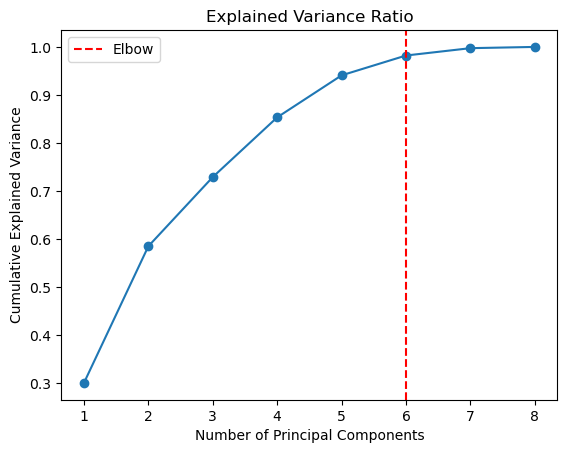

Chosen number of components: 6


In [12]:
import numpy as np

# Assuming you have already performed PCA and have the cumulative_variance_ratio
# If not, you can reuse the previous code snippet to obtain it

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')

# Plot a line at the "elbow" point
# You can manually inspect the plot and choose the elbow point, or automate the process
# In this example, I'll use an automated approach based on the second derivative of the variance ratio
second_derivative = np.diff(np.diff(cumulative_variance_ratio))
elbow_index = np.argmax(second_derivative) +1 # Adding 1 because of the double difference

plt.axvline(x=elbow_index, color='r', linestyle='--', label='Elbow')

plt.legend()
plt.show()

# Display the chosen number of components
print(f"Chosen number of components: {elbow_index}")


# CHOSING THE BEST EPSILON FOR DBSCAN

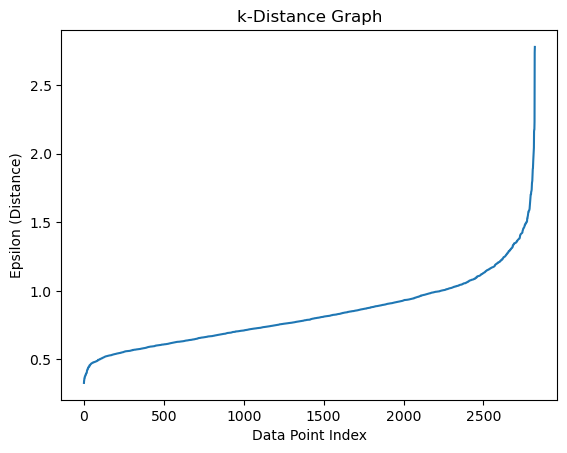

In [15]:
from sklearn.neighbors import NearestNeighbors

# Assuming you have 'selected_components' from the previous code
neighbors = NearestNeighbors(n_neighbors=6)  # You can adjust the number of neighbors
neighbors_fit = neighbors.fit(selected_components)
distances, indices = neighbors_fit.kneighbors(selected_components)

# Plot k-distance graph
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Data Point Index')
plt.ylabel('Epsilon (Distance)')
plt.title('k-Distance Graph')
plt.show()


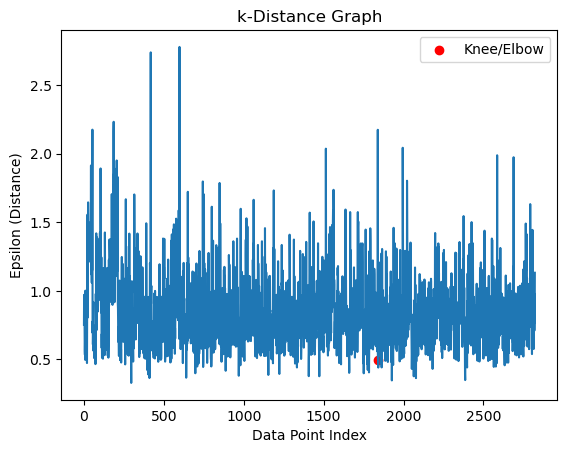

Chosen Epsilon: 0.49960394376457556


In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming you have 'selected_components' from the previous code
neighbors = NearestNeighbors(n_neighbors=6)  # You can adjust the number of neighbors
neighbors_fit = neighbors.fit(selected_components)
distances, indices = neighbors_fit.kneighbors(selected_components)

# Compute the second derivative of the distances
second_derivative = np.diff(np.diff(distances[:, -1]))

# Find the index of the maximum value in the second derivative
knee_index = np.argmax(second_derivative) + 1  # Adding 1 because of the double difference

# Plot k-distance graph
plt.plot(distances[:, -1])
plt.title('k-Distance Graph')
plt.xlabel('Data Point Index')
plt.ylabel('Epsilon (Distance)')

# Highlight the knee/elbow point
plt.scatter(knee_index, distances[knee_index, -1], color='red', marker='o', label='Knee/Elbow')

plt.legend()
plt.show()

# Display the chosen epsilon
chosen_epsilon = distances[knee_index, -1]
print(f"Chosen Epsilon: {chosen_epsilon}")


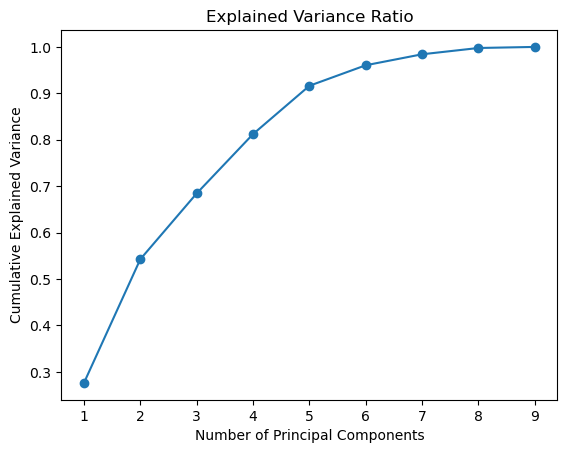

Original DataFrame:
   QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  MONTH_ID  \
0               30      95.70                2  2871.00       1         2   
1               34      81.35                5  2765.90       2         5   
2               41      94.74                2  3884.34       3         7   
3               45      83.26                6  3746.70       3         8   
4               49     100.00               14  5205.27       4        10   

   YEAR_ID  MSRP  STATUS_encoded  PRODUCTLINE_encoded  CITY_encoded  \
0     2003    95               5                    1            42   
1     2003    95               5                    1            56   
2     2003    95               5                    1            52   
3     2003    95               5                    1            53   
4     2003    95               5                    1            59   

   COUNTRY_encoded  DEALSIZE_encoded  CUSTOMERNAME_encoded  Cluster  
0               18  

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with numerical data
# If your data contains non-numerical columns, you may need to preprocess them or exclude them from PCA

# Extract numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame containing only numerical data
numerical_data = df[numerical_columns]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(data=scaled_data, columns=numerical_columns)

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(scaled_data)

# Transform the data to its principal components
pca_result = pca.transform(scaled_data)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, pca_result.shape[1] + 1)]
pca_df = pd.DataFrame(data=pca_result, columns=columns)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Display the DataFrames
print("Original DataFrame:")
print(df.head())

print("\nScaled DataFrame:")
print(scaled_df.head())

print("\nPrincipal Components DataFrame:")
print(pca_df.head())


In [18]:
scaled_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES    QTR_ID  \
0           -0.522891   0.596978        -1.057059 -0.370825 -1.427039   
1           -0.112201  -0.114450        -0.347015 -0.427897 -0.596243   
2            0.606505   0.549384        -1.057059  0.179443  0.234553   
3            1.017195  -0.019759        -0.110334  0.104701  0.234553   
4            1.427884   0.810158         1.783116  0.896740  1.065350   
...               ...        ...              ...       ...       ...   
2818        -1.549615   0.810158         2.019797 -0.711084  1.065350   
2819        -0.625563   0.810158        -1.293740  0.230579 -1.427039   
2820         0.811850   0.810158        -0.583696  1.012024 -1.427039   
2821        -0.112201  -1.061864        -1.293740 -0.780722 -1.427039   
2822         1.222540  -0.899252         0.599710 -0.257637 -0.596243   

      MONTH_ID   YEAR_ID      MSRP   Cluster  
0    -1.392909 -1.165170 -0.142246 -0.718847  
1    -0.572337 -1.165170 -0.142246 -0.718847  
2    -0.025289 -1.165170 -0.142246 -0.718847  
3     0.248235 -1.165170 -0.142246 -0.718847  
4     0.795284 -1.165170 -0.142246 -0.718847  
...        ...       ...       ...       ...  
2818  1.342332  0.264328 -1.162634  0.465803  
2819 -1.666433  1.693826 -1.162634  1.650453  
2820 -1.119385  1.693826 -1.162634  1.650453  
2821 -1.119385  1.693826 -1.162634  1.650453  
2822 -0.572337  1.693826 -1.162634 -1.903497  

[2823 rows x 9 columns]

In [19]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.828443 -0.026731  1.217237 -1.020753 -1.912056 -0.909788  0.075784   
1    -0.146386 -0.380159  1.093685 -0.390379 -1.046292 -0.455043 -0.238549   
2    -0.810048  0.538059  0.394122  0.430890 -1.368296 -0.655552  0.162757   
3    -1.038274  0.249561  0.845097  0.790839 -0.488432 -0.433460 -0.210354   
4    -1.956173  1.188275  1.077522  0.893549  1.489150 -0.922077  0.047341   
...        ...       ...       ...       ...       ...       ...       ...   
2818 -1.261411 -1.109867 -0.966034 -1.271002  2.282037 -0.862411  0.903088   
2819  3.286467 -0.188664 -1.190887 -0.172013 -0.624107 -0.926062  0.894331   
2820  2.980846  0.602862 -0.753511  1.119312  0.216434 -1.039438  0.735359   
2821  2.983144 -1.677235 -1.022012  0.660162 -0.628814  0.101953  0.010799   
2822  0.813009 -0.887513  1.746580  1.384270  0.542725  1.178304  1.758945   

           PC8       PC9  
0    -0.234841  0.026676  
1    -0.182518  0.019336  
2    -0.349595 -0.179227  
3    -0.344330  0.016458  
4    -0.206491 -0.173576  
...        ...       ...  
2818  0.196470  0.202542  
2819  0.411985 -0.178588  
2820  0.362057  0.214315  
2821  0.133252  0.203458  
2822 -0.251273  0.032285  

[2823 rows x 9 columns]

In [20]:
from sklearn.cluster import DBSCAN

# Assuming you have the 'pca_df' DataFrame from the previous code

# Choose the number of components you want to use for clustering
# You can use the elbow method or other techniques to determine this
num_components_for_clustering = 6  # Adjust this based on your analysis

# Select the desired number of principal components
selected_components = pca_df.iloc[:, :num_components_for_clustering]

# Perform DBSCAN on the selected principal components
epsilon = 1.20  # Adjust the epsilon (neighborhood distance) based on your data
min_samples = 15  # Adjust the min_samples based on your data

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(selected_components)

# Add the cluster labels to the original DataFrame
df['Cluster'] = labels
pca_df['Cluster'] = labels

# Display the clusters
print("Clusters:")
print(df['Cluster'].value_counts())

# Plot the clusters (assuming 2D or 3D data)
if num_components_for_clustering == 2:
    plt.scatter(selected_components.iloc[:, 0], selected_components.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('DBSCAN Clustering on PCA Components')
    plt.show()
elif num_components_for_clustering == 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(selected_components.iloc[:, 0], selected_components.iloc[:, 1], selected_components.iloc[:, 2], c=labels, cmap='viridis', marker='o')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('DBSCAN Clustering on PCA Components')
    plt.show()
else:
    print("Can't visualize clusters for more than 3 dimensions.")


Clusters:
 1    1263
 0     893
 2     373
-1     294
Name: Cluster, dtype: int64
Can't visualize clusters for more than 3 dimensions.


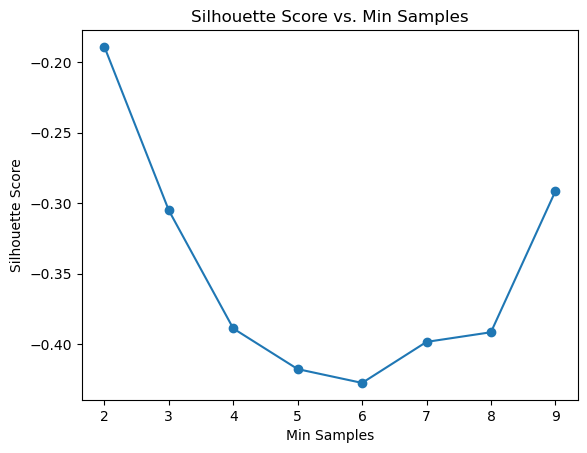

Optimal Min Samples: 2


In [21]:
from sklearn.metrics import silhouette_score

min_samples_values = range(2, 10)  # Adjust the range based on your data
silhouette_scores = []

for min_samples_val in min_samples_values:
    dbscan = DBSCAN(eps=chosen_epsilon, min_samples=min_samples_val)
    labels = dbscan.fit_predict(selected_components)
    silhouette_scores.append(silhouette_score(selected_components, labels))

# Plot silhouette scores
plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Min Samples')
plt.show()

# Choose the min_samples with the highest silhouette score
optimal_min_samples = min_samples_values[np.argmax(silhouette_scores)]
print(f"Optimal Min Samples: {optimal_min_samples}")


In [22]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.828443 -0.026731  1.217237 -1.020753 -1.912056 -0.909788  0.075784   
1    -0.146386 -0.380159  1.093685 -0.390379 -1.046292 -0.455043 -0.238549   
2    -0.810048  0.538059  0.394122  0.430890 -1.368296 -0.655552  0.162757   
3    -1.038274  0.249561  0.845097  0.790839 -0.488432 -0.433460 -0.210354   
4    -1.956173  1.188275  1.077522  0.893549  1.489150 -0.922077  0.047341   
...        ...       ...       ...       ...       ...       ...       ...   
2818 -1.261411 -1.109867 -0.966034 -1.271002  2.282037 -0.862411  0.903088   
2819  3.286467 -0.188664 -1.190887 -0.172013 -0.624107 -0.926062  0.894331   
2820  2.980846  0.602862 -0.753511  1.119312  0.216434 -1.039438  0.735359   
2821  2.983144 -1.677235 -1.022012  0.660162 -0.628814  0.101953  0.010799   
2822  0.813009 -0.887513  1.746580  1.384270  0.542725  1.178304  1.758945   

           PC8       PC9  Cluster  
0    -0.234841  0.026676        0  
1    -0.182518  0.019336        0  
2    -0.349595 -0.179227        0  
3    -0.344330  0.016458        0  
4    -0.206491 -0.173576        0  
...        ...       ...      ...  
2818  0.196470  0.202542        1  
2819  0.411985 -0.178588        2  
2820  0.362057  0.214315        2  
2821  0.133252  0.203458        2  
2822 -0.251273  0.032285       -1  

[2823 rows x 10 columns]

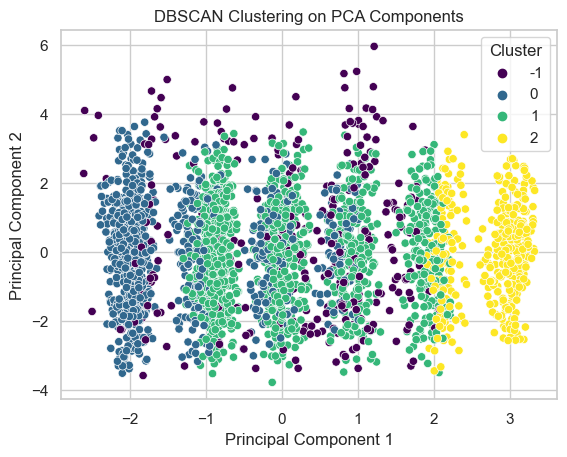

In [23]:
import seaborn as sns

# Assuming you have the 'df' DataFrame with a 'Cluster' column from the previous code

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot based on the 'Cluster' column as the hue
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA Components')
plt.show()


In [24]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.828443 -0.026731  1.217237 -1.020753 -1.912056 -0.909788  0.075784   
1    -0.146386 -0.380159  1.093685 -0.390379 -1.046292 -0.455043 -0.238549   
2    -0.810048  0.538059  0.394122  0.430890 -1.368296 -0.655552  0.162757   
3    -1.038274  0.249561  0.845097  0.790839 -0.488432 -0.433460 -0.210354   
4    -1.956173  1.188275  1.077522  0.893549  1.489150 -0.922077  0.047341   
...        ...       ...       ...       ...       ...       ...       ...   
2818 -1.261411 -1.109867 -0.966034 -1.271002  2.282037 -0.862411  0.903088   
2819  3.286467 -0.188664 -1.190887 -0.172013 -0.624107 -0.926062  0.894331   
2820  2.980846  0.602862 -0.753511  1.119312  0.216434 -1.039438  0.735359   
2821  2.983144 -1.677235 -1.022012  0.660162 -0.628814  0.101953  0.010799   
2822  0.813009 -0.887513  1.746580  1.384270  0.542725  1.178304  1.758945   

           PC8       PC9  Cluster  
0    -0.234841  0.026676        0  
1    -0.182518  0.019336        0  
2    -0.349595 -0.179227        0  
3    -0.344330  0.016458        0  
4    -0.206491 -0.173576        0  
...        ...       ...      ...  
2818  0.196470  0.202542        1  
2819  0.411985 -0.178588        2  
2820  0.362057  0.214315        2  
2821  0.133252  0.203458        2  
2822 -0.251273  0.032285       -1  

[2823 rows x 10 columns]

In [25]:
# Drop columns PRODUCTCODE bc it has the info as PRODUCTLINE

columns_to_drop = ['PC6','PC7','PC8']
pca_df = pca_df.drop(columns=columns_to_drop)

In [26]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC9  Cluster
0     0.828443 -0.026731  1.217237 -1.020753 -1.912056  0.026676        0
1    -0.146386 -0.380159  1.093685 -0.390379 -1.046292  0.019336        0
2    -0.810048  0.538059  0.394122  0.430890 -1.368296 -0.179227        0
3    -1.038274  0.249561  0.845097  0.790839 -0.488432  0.016458        0
4    -1.956173  1.188275  1.077522  0.893549  1.489150 -0.173576        0
...        ...       ...       ...       ...       ...       ...      ...
2818 -1.261411 -1.109867 -0.966034 -1.271002  2.282037  0.202542        1
2819  3.286467 -0.188664 -1.190887 -0.172013 -0.624107 -0.178588        2
2820  2.980846  0.602862 -0.753511  1.119312  0.216434  0.214315        2
2821  2.983144 -1.677235 -1.022012  0.660162 -0.628814  0.203458        2
2822  0.813009 -0.887513  1.746580  1.384270  0.542725  0.032285       -1

[2823 rows x 7 columns]

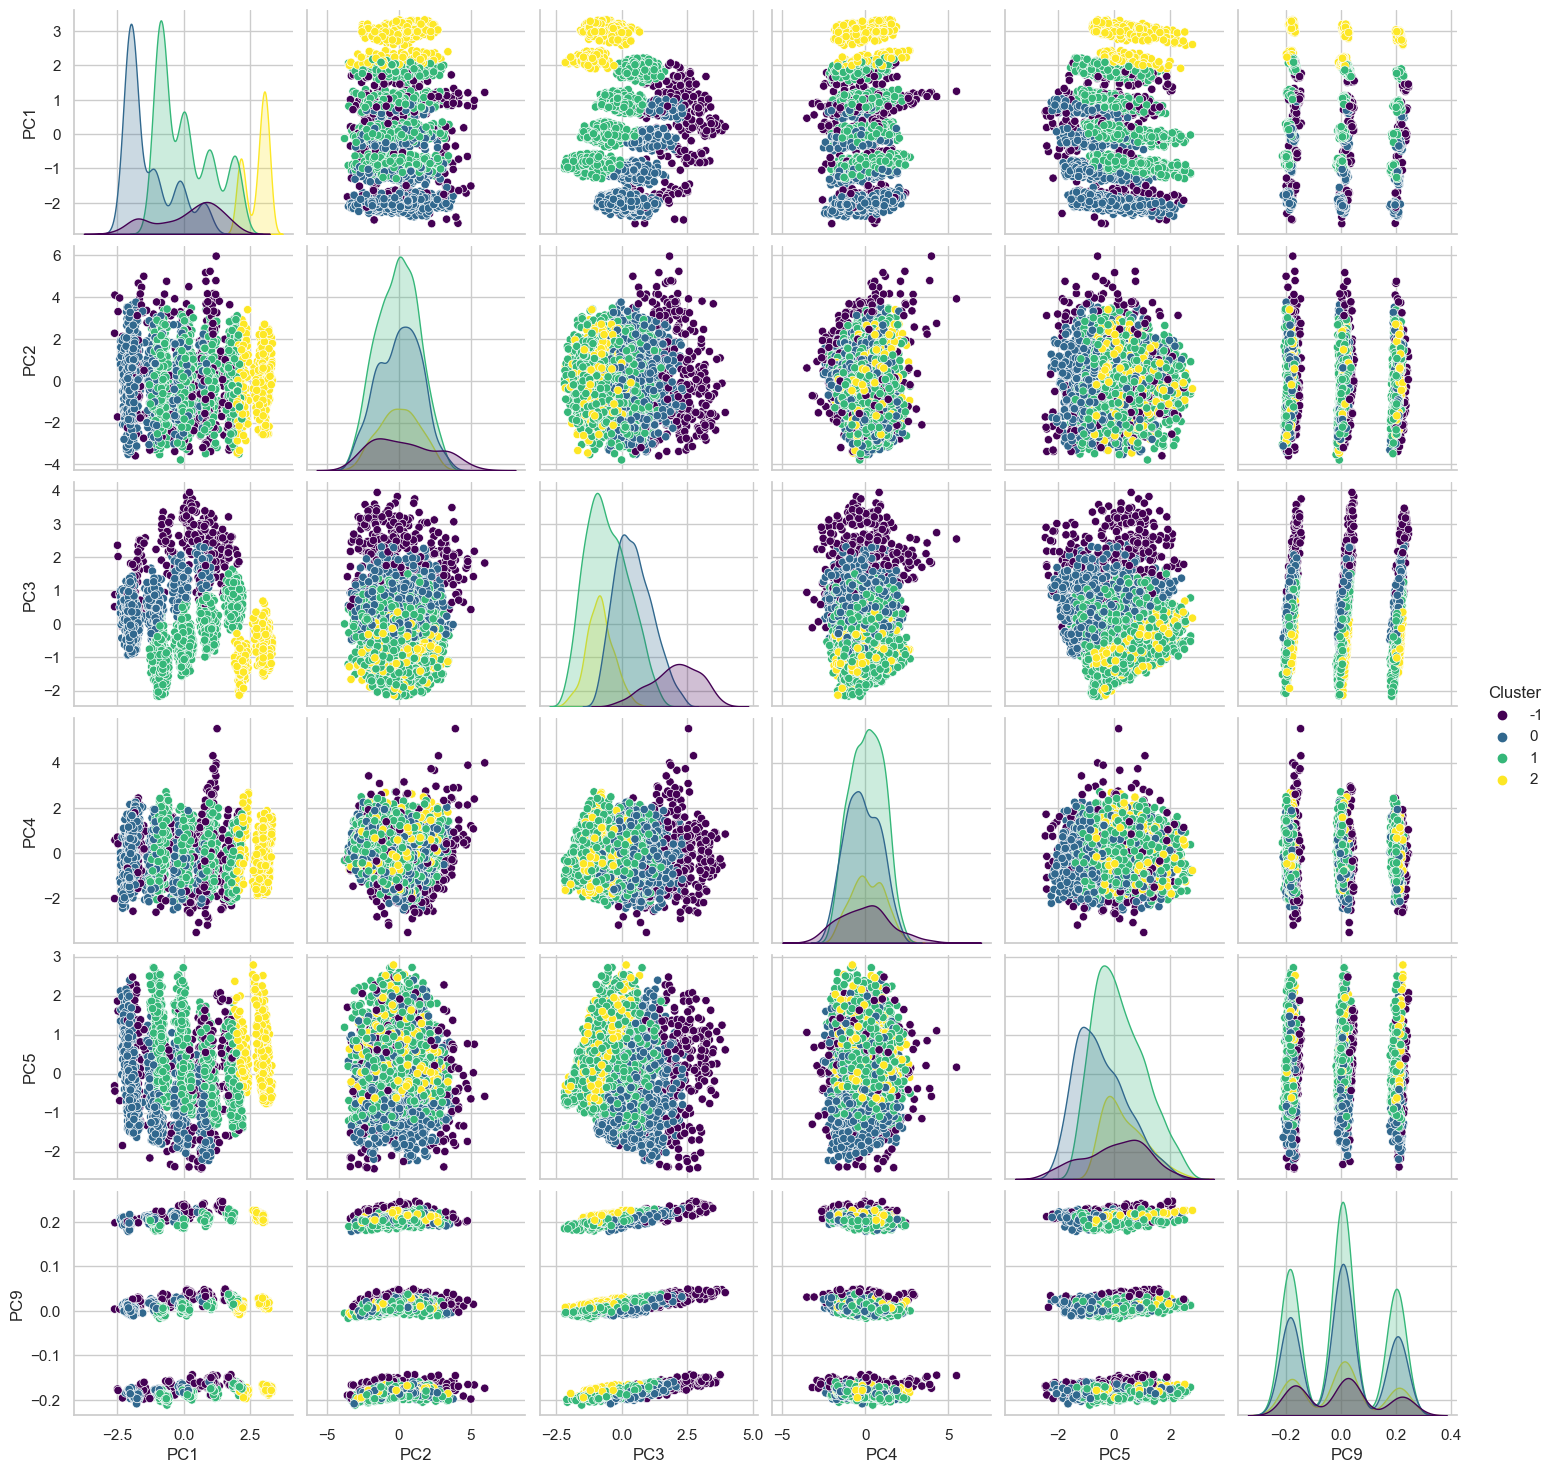

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hue_column' is the column you want to use as the hue
sns.pairplot(pca_df, hue='Cluster', palette='viridis')
plt.show()


In [28]:
df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  MONTH_ID  \
0                  30      95.70                2  2871.00       1         2   
1                  34      81.35                5  2765.90       2         5   
2                  41      94.74                2  3884.34       3         7   
3                  45      83.26                6  3746.70       3         8   
4                  49     100.00               14  5205.27       4        10   
...               ...        ...              ...      ...     ...       ...   
2818               20     100.00               15  2244.40       4        12   
2819               29     100.00                1  3978.51       1         1   
2820               43     100.00                4  5417.57       1         3   
2821               34      62.24                1  2116.16       1         3   
2822               47      65.52                9  3079.44       2         5   

      YEAR_ID  MSRP  STATUS_encoded  PRODUCTLINE_encoded  CITY_encoded  \
0        2003    95               5                    1            42   
1        2003    95               5                    1            56   
2        2003    95               5                    1            52   
3        2003    95               5                    1            53   
4        2003    95               5                    1            59   
...       ...   ...             ...                  ...           ...   
2818     2004    54               5                    3            34   
2819     2005    54               5                    3            51   
2820     2005    54               4                    3            34   
2821     2005    54               5                    3            68   
2822     2005    54               3                    3             6   

      COUNTRY_encoded  DEALSIZE_encoded  CUSTOMERNAME_encoded  Cluster  
0                  18                 2                    45        0  
1                   6                 2                    66        0  
2                   6                 1                    46        0  
3                  18                 1                    85        0  
4                  18                 1                    23        0  
...               ...               ...                   ...      ...  
2818               14                 2                    33        1  
2819                5                 1                    63        2  
2820               14                 1                    33        2  
2821                6                 2                     1        2  
2822               18                 1                    37       -1  

[2823 rows x 15 columns]

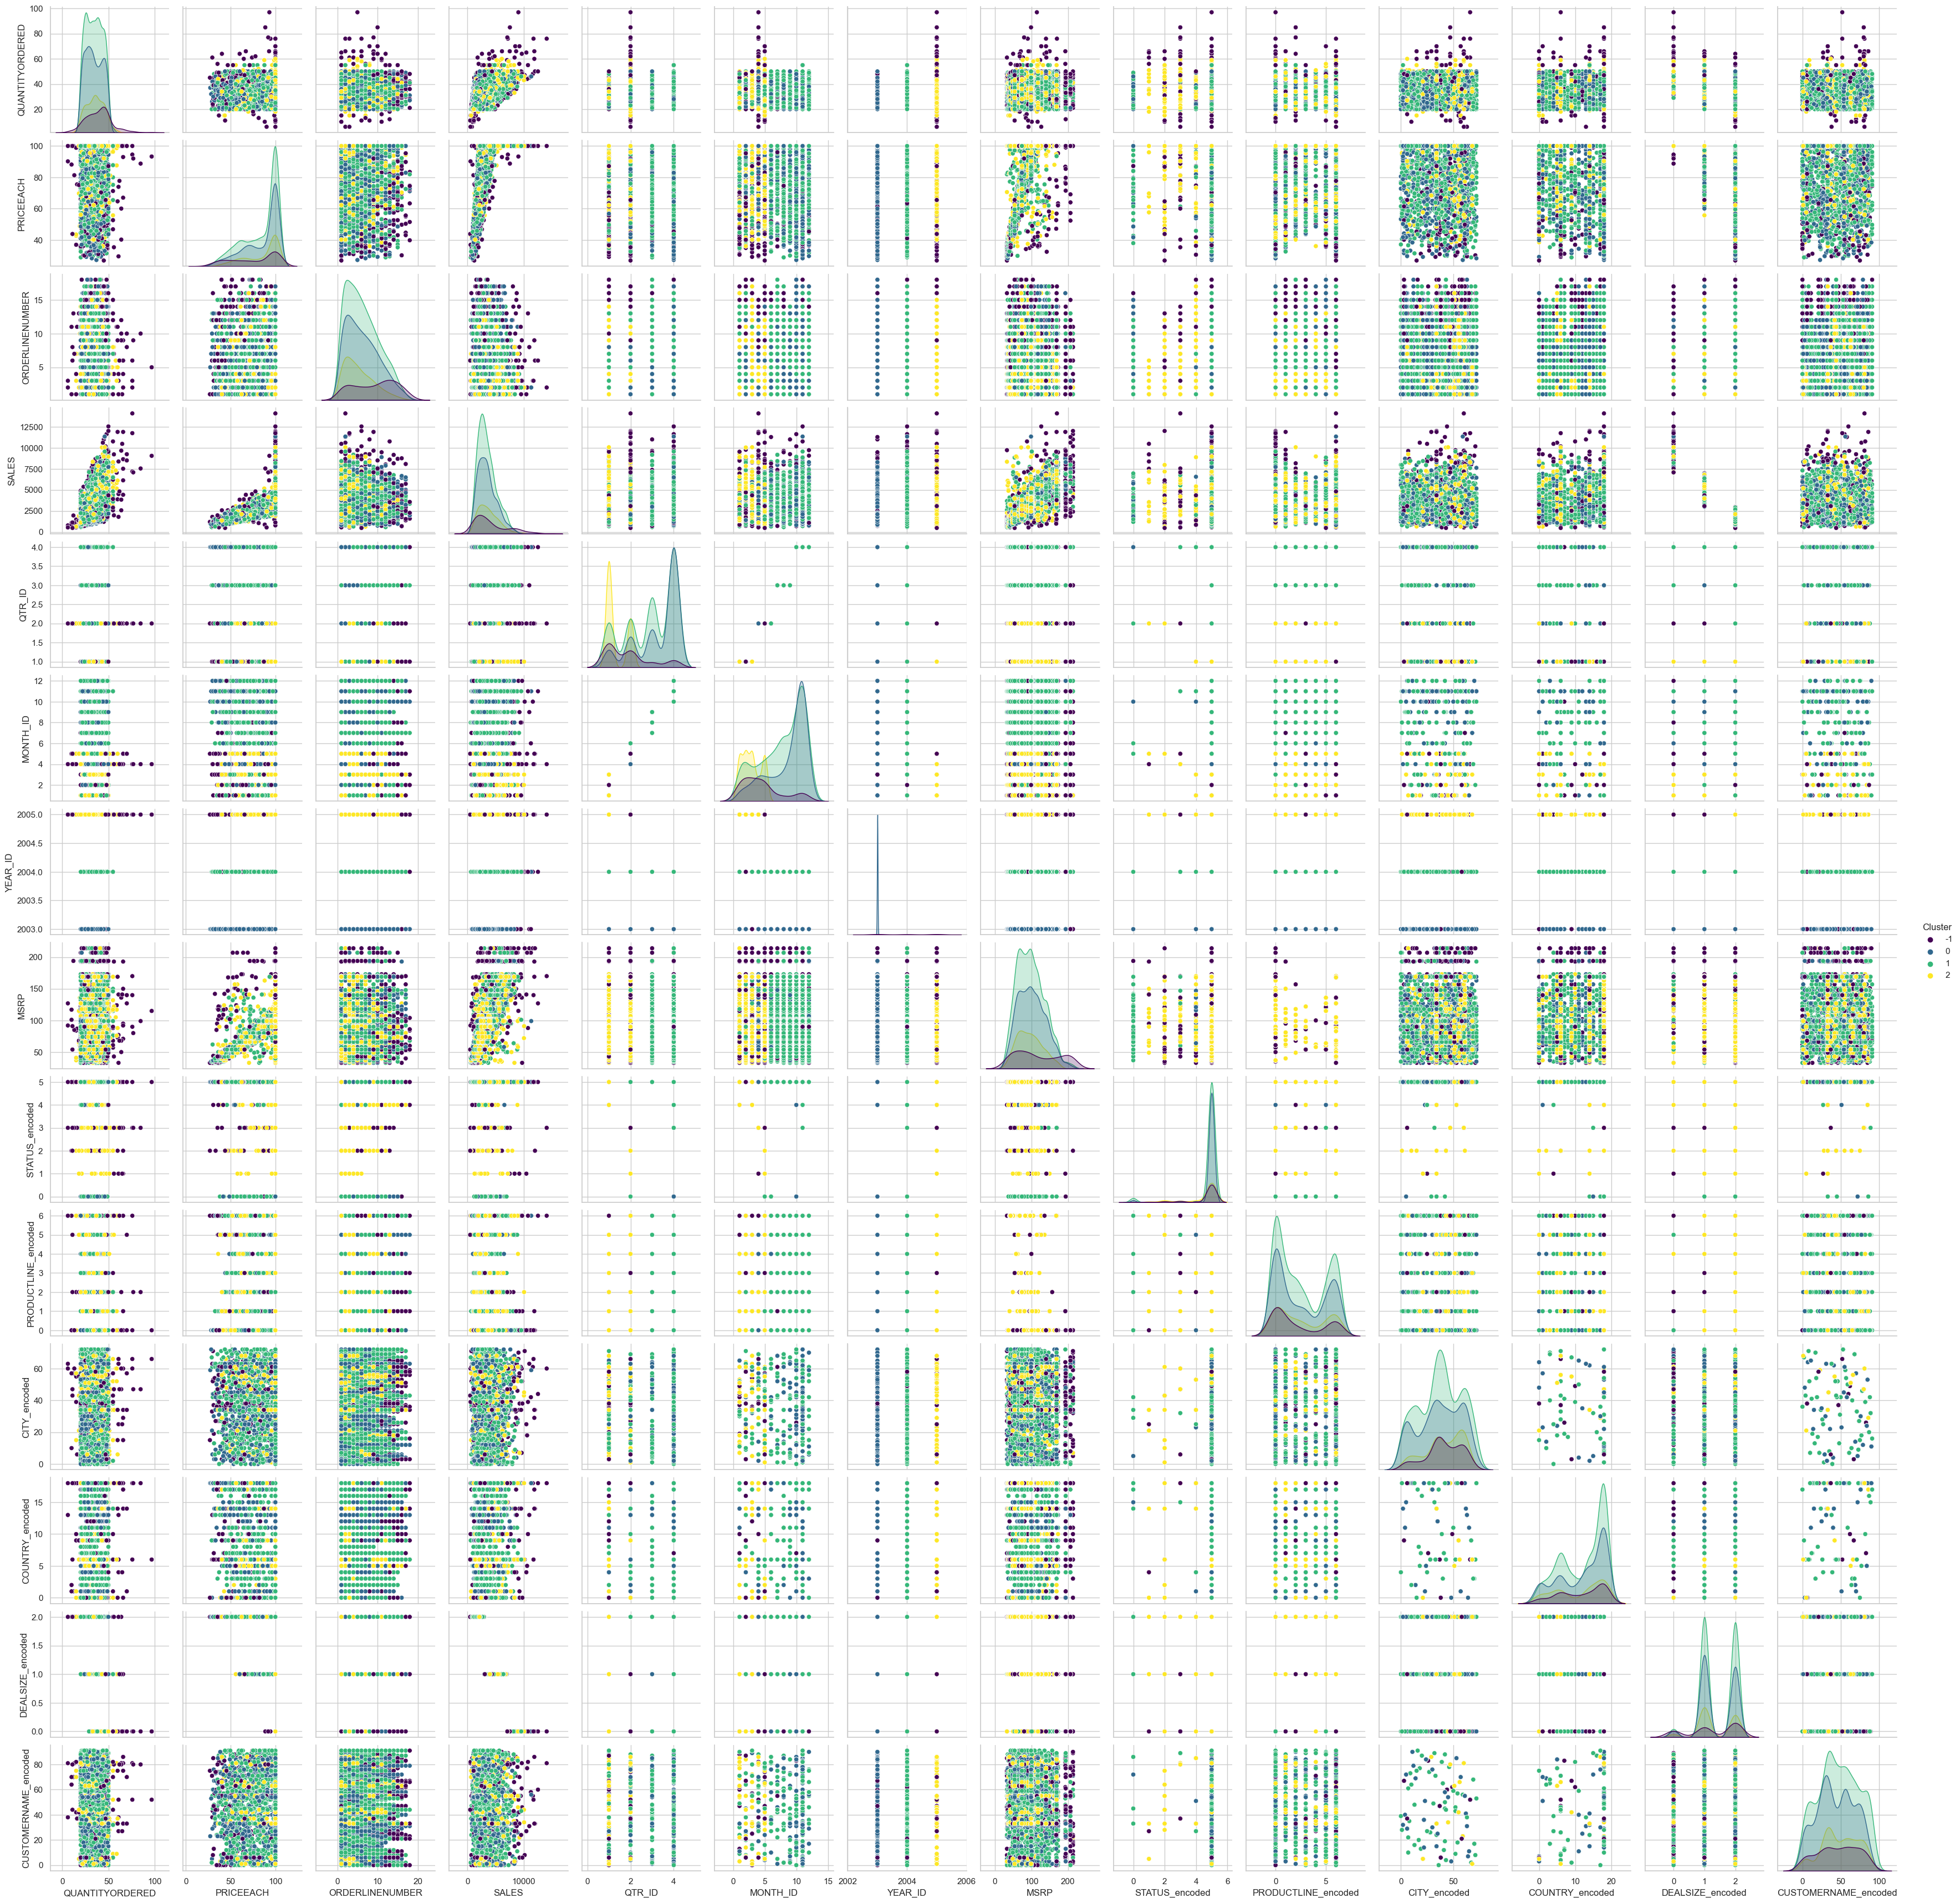

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hue_column' is the column you want to use as the hue
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()